BUSINESS UNDERSTANDING:
untuk memprediksi penumpang dari kapal titanic yang berhasil selamat

DATA UNDERSTANDING

a. Pengumpulan & pencarian data. Sumber: https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Ruangguru/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Ruangguru/test.csv")

FileNotFoundError: ignored

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


b. Analisis Deskriptif Data Train (Ringkasan Statistik data Train)



In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b. Analisis Deskriptif Data Test (Ringkasan Statistik data Test)

In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


c. Eksplorasi data & Visualisasi Data

In [ ]:
# UTK DATA TRAIN
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#mengetahui tipe2 data di data train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#menghitung nilai null di data train
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#UTK DATA TEST
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
#mengetahui tipe2 data di data test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#menghitung nilai null di data test
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Visualisasi by Gender

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


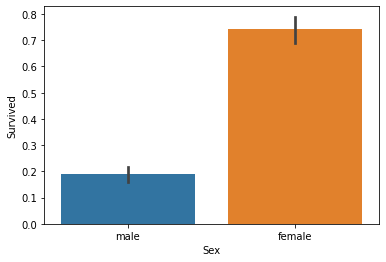

In [ ]:
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Visualisasi berdasarkan Pclass


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


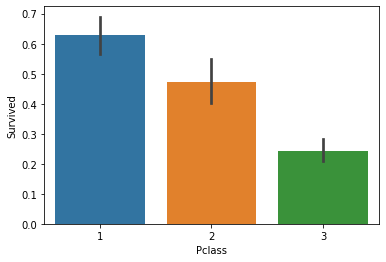

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Visualisasi berdasarkan Sibsp

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


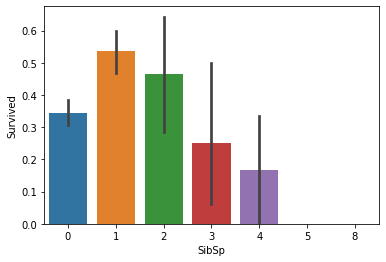

In [ ]:
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Visualisasi berdasarkan parch

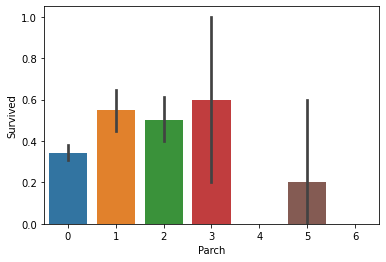

In [ ]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

Visualisasi berdasarkan age

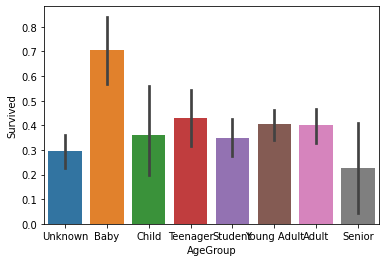

In [ ]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Visualisasi berdasarkan Cabin

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


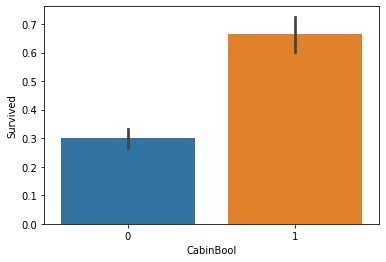

In [ ]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#menghitung % yg survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

#plot yg selamat
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()


DATA PREPARATION 

In [ ]:
#CLEANING DATA YG BANYAK NULL (cabin)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [ ]:
#CLEANING DATA TICKET KRN INFORMASI YG AKAN DIDAPATKAN TDK BEGITU BERMANFAAT
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [ ]:
#karena nilai NULL pada embarked tidak terlalu banyak, maka dapat mengisi missing values tsb dgn S

train = train.fillna({"Embarked": "S"})

In [ ]:
#age feature cukup byk yg null, walaupun begitu ttp mengisi nilai null tsb krn bisa mendapatkan info bermanfaat dr age yg dapat survive

combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#mengganti title dengan nama yang umum, seperti Miss, Mrs, dsb
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [ ]:
#memetakan title yang telah diubah tadi menjadi numerik
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [ ]:
# mengisi umur yang kosong
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [ ]:
#memetakan umur dengan nilai numerik
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#menghapus fitur age
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [ ]:
#menghapus fitur name karena tidak mengandung informasi yg bermanfaat
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [ ]:
#memetakan sex ke nilai numerik
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [ ]:
#memetakan embarked ke nilai numerik
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [ ]:
#mengisi nilai pada fare yang hilang berdasarkan rata2
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#memetakan fare ke nilai numerik
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [ ]:
#melihat data yang telah dirapikan
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [ ]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


MODELLING
#mencari model terbaik utk klasifikasi

In [ ]:
#split data training
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [ ]:
#1. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [ ]:
#2. Support Vector Machines
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [ ]:
#2. Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [ ]:
#3. Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [ ]:
#4.Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.71


In [ ]:
#5. KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.23


In [ ]:
#membandingkan nilai yg terbaik
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Naive Bayes', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_gaussian, acc_linear_svc, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,82.74
1,KNN,82.23
4,Decision Tree,80.71
2,Naive Bayes,78.68
3,Linear SVC,78.17


*EVALUATION*
Berdasarkan modelling, terlihat bahwa SVM merupakan metode pengklasifikasian terbaik untuk permasalahan ini. Maka, ingin dilihat confusion matrix dari SVM sebagai berikut.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

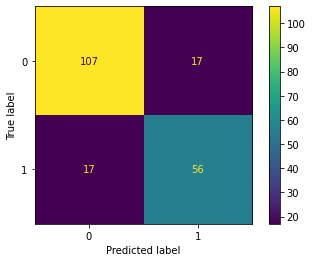

In [ ]:

plot_confusion_matrix(svc,x_val,y_val)

In [ ]:
print(classification_report(y_pred,y_val,labels=[1,2]))

              precision    recall  f1-score   support

           1       0.74      0.77      0.76        70
           2       0.00      0.00      0.00         0

   micro avg       0.74      0.77      0.76        70
   macro avg       0.37      0.39      0.38        70
weighted avg       0.74      0.77      0.76        70



In [ ]:
import pickle
pik=pickle.dumps(svc)
svc2=pickle.loads(pik)
svc2.predict(x_val[0:1])

array([0])

In [ ]:
pickle.dump(svc,open('svcobj.pickle','wb'))

In [ ]:
load_model=pickle.load(open('svcobj.pickle','rb'))
result=load_model.score(x_val,y_val)
print(result)

0.8274111675126904


In [ ]:
train.shape

(891, 11)

In [ ]:
test.shape

(418, 10)

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'AgeGroup', 'CabinBool', 'Title', 'FareBand'],
      dtype='object')

In [ ]:
print(SVC.coef_)

DEPLOYMENT

In [ ]:
load_model.predict(np.array([(0,3,0,0,0,3,0,1,1)]).reshape(1,-1))

ValueError: ignored

In [ ]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [ ]:
train['AgeGroup'].unique()

array([4., 6., 5., 1., 3., 2., 7.])

In [ ]:
train['Embarked'].unique()

array([1, 2, 3])

In [ ]:
train['CabinBool'].unique()

array([0, 1])

In [ ]:
train['AgeGroup']

0      4.0
1      6.0
2      5.0
3      5.0
4      5.0
      ... 
886    5.0
887    4.0
888    4.0
889    5.0
890    5.0
Name: AgeGroup, Length: 891, dtype: float64

In [ ]:
train['FareBand'].unique()

[1, 4, 2, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
load_model.predict(np.array([(892,3,0,0,0,3,5.0,0,1)]).reshape(1,-1))

array([0])

In [ ]:
load_model.predict(np.array([(3,0,1,0,1,4.0,1,1,1)]).reshape(1,-1))

array([0])

In [ ]:
load_model.predict(np.array([(1,1,1,0,2,6.0,1,3,4)]).reshape(1,-1))

array([1])

In [ ]:
print(np.array([(5,3,0,0,0,3,0,1,1)]).reshape(1,-1))

[[0 3 0 0 0 3 0 1 1]]


In [ ]:
print(np.array([(0,3,0,0,0,3,0,1,1)]))

[[0 3 0 0 0 3 0 1 1]]


In [ ]:
!python --version

Python 3.7.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.3.5
1.21.5
0.11.2


In [ ]:
pickle.format__version__

AttributeError: ignored

In [ ]:
pickle

<module 'pickle' from '/usr/lib/python3.7/pickle.py'>

In [ ]:
print(pickle.format_version)

4.0


In [ ]:
print(scikit-learn.__version__)

NameError: ignored

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.0.2
